In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch.optim as optim

# Making the data

## Generating the data

In [2]:
weight =0.7
bias=0.3
X = torch.arange(0,1,0.02).unsqueeze(dim=1)
y = weight * X + bias

In [3]:
X[:5]

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800]])

## Splitting for Training and Testing

In [4]:
x_train = X[:int(0.8*len(X))]
y_train = y[:int(0.8*len(X))]
x_test = X[int(0.8*len(X)):]
y_test = y[int(0.8*len(X)):]

In [5]:
x_train.size() ,y_train.size()

(torch.Size([40, 1]), torch.Size([40, 1]))

In [6]:
def plot_graph(x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test, predictions=None, prediction_range=None):
  plt.figure(figsize=(5, 5))
  plt.scatter(x_train, y_train, c="b", s=4, label="training data")
  plt.scatter(x_test, y_test, c="g", s=4, label="testing data")
  if predictions is not None:
    if len(predictions) != len(x_test):
      plt.plot(prediction_range, predictions, c="r", label="predictions")
    else:
      plt.scatter(x_test, predictions, s=4, c="r", label="predictions")
  plt.legend(prop={"size": 14})
  plt.show()

## Plotting Initial data

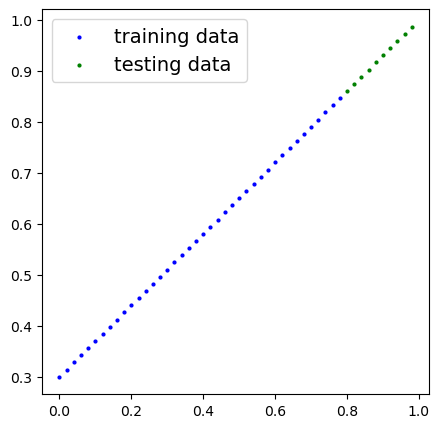

In [7]:
plot_graph()

# Constructing the Model

## Defining the Linear Model

In [8]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.rand(1, requires_grad=True))
        self.bias = nn.Parameter(torch.rand(1, requires_grad=True))
    def forward(self, x:torch.Tensor)->torch.Tensor:
        return self.weights * x + self.bias


## Model Instantiation

In [9]:
torch.manual_seed(42)
model = LinearRegressionModel()

In [10]:
list(model.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

## Pre-train predictions

In [11]:
y_pred = model(x_test)
y_pred[:5]

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914]], grad_fn=<SliceBackward0>)

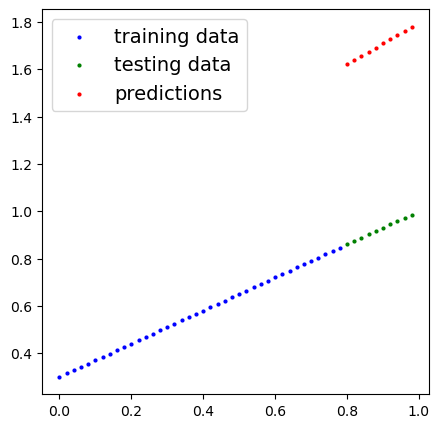

In [12]:
plot_graph(predictions=y_pred.detach().numpy())

## Loss Function and Optimizer

In [13]:
loss_fn = nn.MSELoss()  # Mean Squared Error (convex for regression)
optimizer = optim.SGD(params=model.parameters(), lr=0.01)


## Training Loop

In [14]:
epochs = 2300

# Setting the model to train mode
model.train()

# Training Loop
for epoch in range(epochs):

  # Forward Pass
  y_pred = model(x_train)

  # Computing Loss
  loss= loss_fn(y_pred, y_train)

  # Clearing past gradients
  optimizer.zero_grad()

  # Backpropogating
  loss.backward()

  # Computing Gradients and Updating Weights
  optimizer.step()

  # Validation Step
  model.eval()
  with torch.inference_mode():
    test_pred = model(x_test)
    test_loss = loss_fn(test_pred, y_test)

    if epoch % 400 == 0:
      print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss: 0.47248879075050354 | Test Loss: 0.5755255818367004
Epoch: 400 | Loss: 9.021181176649407e-05 | Test Loss: 0.0003915414272341877
Epoch: 800 | Loss: 4.3217667553108186e-05 | Test Loss: 0.00018883339362218976
Epoch: 1200 | Loss: 2.0704870621557347e-05 | Test Loss: 9.046594641404226e-05
Epoch: 1600 | Loss: 9.919742296915501e-06 | Test Loss: 4.3342985009076074e-05
Epoch: 2000 | Loss: 4.752449513034662e-06 | Test Loss: 2.0764802684425376e-05


## Updated Parameters

In [15]:
weight, bias = list(model.parameters())
weight, bias

(Parameter containing:
 tensor([0.6929], requires_grad=True),
 Parameter containing:
 tensor([0.3029], requires_grad=True))

## Pedictions

In [16]:
y_pred = model(x_test)

## Visualize

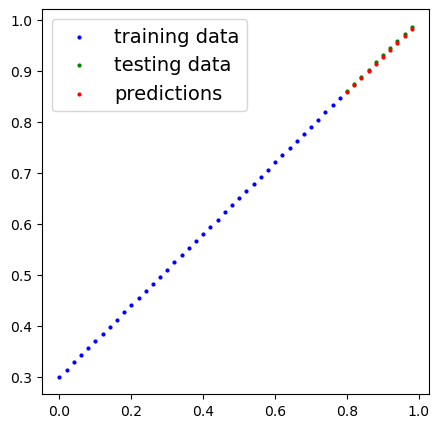

In [17]:
plot_graph(predictions=y_pred.detach().numpy())

# Real Time Regression Problem

In [18]:
import pandas as pd

data = pd.read_csv("./data/Salary_Data.csv")
data

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [19]:
X = torch.tensor(data["YearsExperience"], dtype=torch.float).unsqueeze(dim=1)
y = torch.tensor(data['Salary'], dtype=torch.float).unsqueeze(dim=1)

In [20]:
X[: 5]

tensor([[1.1000],
        [1.3000],
        [1.5000],
        [2.0000],
        [2.2000]])

In [21]:
x_train = X[:int(0.8*len(X))]
y_train = y[:int(0.8*len(X))]

# x_test = torch.tensor(X[int(0.8*len(X)):])
# y_test = torch.tensor(y[int(0.8*len(X)):])

In [22]:
x_train[: 5]

tensor([[1.1000],
        [1.3000],
        [1.5000],
        [2.0000],
        [2.2000]])

In [23]:
y_train[: 5]

tensor([[39343.],
        [46205.],
        [37731.],
        [43525.],
        [39891.]])

In [24]:
int(0.8*len(X))

24

In [25]:
x_test = X[24:]
y_test = y[24:]

In [26]:
y[: 5]

tensor([[39343.],
        [46205.],
        [37731.],
        [43525.],
        [39891.]])

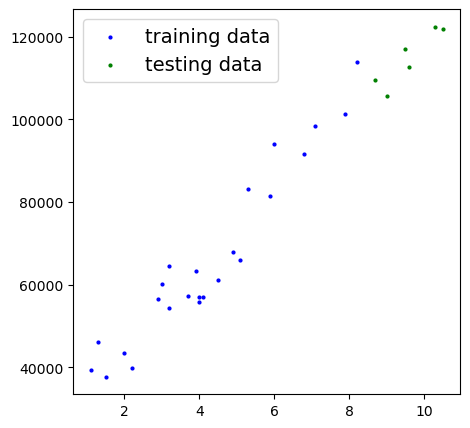

In [27]:
plot_graph(x_train, y_train, x_test, y_test)

In [28]:
epochs = 2700

model.train()

# Training Loop
for epoch in range(epochs):

  # forward pass
  y_pred_ = model(x_train)

  # Computing loss
  loss = loss_fn(y_pred_, y_train)

  # Clearing Past gradients
  optimizer.zero_grad()

  # Backpropogation
  loss.backward()

  # Computing gradients and updating weights
  optimizer.step()

  # print(f"Epoch: {epoch} | Loss: {loss}")

In [29]:
# Printing Updated weights
weight, bias = list(model.parameters())
weight, bias

(Parameter containing:
 tensor([10053.1758], requires_grad=True),
 Parameter containing:
 tensor([23657.8555], requires_grad=True))

In [30]:
# Making final predictions
y_pred = model(x_test)

In [31]:
# Printing predictions
y_pred

tensor([[111120.4844],
        [114136.4375],
        [119163.0312],
        [120168.3438],
        [127205.5625],
        [129216.2031]], grad_fn=<AddBackward0>)

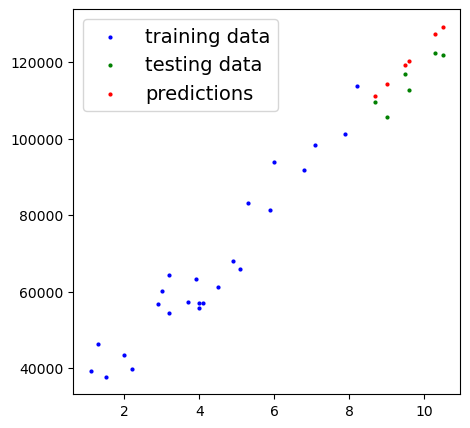

In [32]:
# Visualizing the predictions
plot_graph(x_train, y_train, x_test, y_test, predictions=y_pred.detach().numpy())

In [33]:
model

LinearRegressionModel()

In [34]:
# x-values for prediction line
prediction_range = torch.linspace(0, 10, 300).unsqueeze(dim=1)
prediction_range[:5]

tensor([[0.0000],
        [0.0334],
        [0.0669],
        [0.1003],
        [0.1338]])

In [35]:
# y-values for prediction line
prediction_line = model(prediction_range)

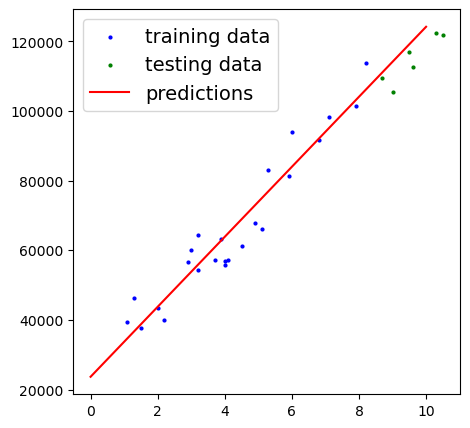

In [36]:
# Plotting line
plot_graph(x_train, y_train, x_test, y_test, predictions=prediction_line.detach().numpy(), prediction_range=prediction_range.detach().numpy())